#### Plans
Dont make it too long  
-x-what to call it?  
    -x-inference statistics? What am I inferring? What relationships of the features am I lookin at?  
    -x-Data Analysis?  Performing deeper analysis on the average ratings over the years.    
    -x-Storytelling?  Telling a story of the data    
-x-Lookat the average ratings yearly  
    -x-what may be causing it?    
    -x-Look at distribution of rating yearly  
Look at if the lowest or highest values are within 95% confidence interval  
    look at entire data set?  
    overall mean of ratings minus mean of 2005
    is the difference significant?
    hypothesis of the means being the same value
        shift the means so that they are equal?
Think of other hypothesis tests that can be performed  
Dont make it too long    



look at distribution of 1, 2, 3, 4,5 ratings for the best year, worst year, most recent year, and overall?
    calculate the difference in proportions?
    calculate overall proportion of entire dataset
    is this different from the yearly proportions observed? statisticall significant?
    1 vs all? or all separate? for proportions.

In [7]:
#importing relevant packages and modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#setting default plot settings
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.3)

In [9]:
#accessing the local directory for the data
PATH = os.path.join(os.environ['HOMEPATH'], 'data', 'amazon_cleaned.csv')
df = pd.read_csv(PATH, index_col=0)

Setting up the time index

In [10]:
df.head()

,itemID,rating,reviewText,reviewTime,reviewerID,summary,foundHelpful,totalHelpful
0,0528881469,5,We got this GPS for my husband who is an (OTR)...,2013-06-02,AO94DHGC771SJ,Gotta have GPS!,0,0
1,0528881469,1,"I'm a professional OTR truck driver, and I bou...",2010-11-25,AMO214LNFCEI4,Very Disappointed,12,15
2,0528881469,3,"Well, what can I say. I've had this unit in m...",2010-09-09,A3N7T0DY83Y4IG,1st impression,43,45
3,0528881469,2,"Not going to write a long review, even thought...",2010-11-24,A1H8PY3QHMQQA0,"Great grafics, POOR GPS",9,10
4,0528881469,1,I've had mine for a year and here's what we go...,2011-09-29,A24EV6RXELQZ63,"Major issues, only excuses for support",0,0


In [11]:
df_time_rating = df[['reviewTime', 'rating']].set_index('reviewTime')

In [12]:
df_time_rating.index = pd.to_datetime(df_time_rating.index)

In [13]:
yearly_ratings = df_time_rating.resample('1y').mean()

In [14]:
yearly_ratings.head

<bound method NDFrame.head of               rating
reviewTime          
1999-12-31  4.388889
2000-12-31  4.321909
2001-12-31  4.187694
2002-12-31  4.110151
2003-12-31  4.014378
2004-12-31  3.876139
2005-12-31  3.913986
2006-12-31  3.989448
2007-12-31  4.140566
2008-12-31  4.149623
2009-12-31  4.130232
2010-12-31  4.110890
2011-12-31  4.128648
2012-12-31  4.192025
2013-12-31  4.282935
2014-12-31  4.291534>

C:\Users\Thompson\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


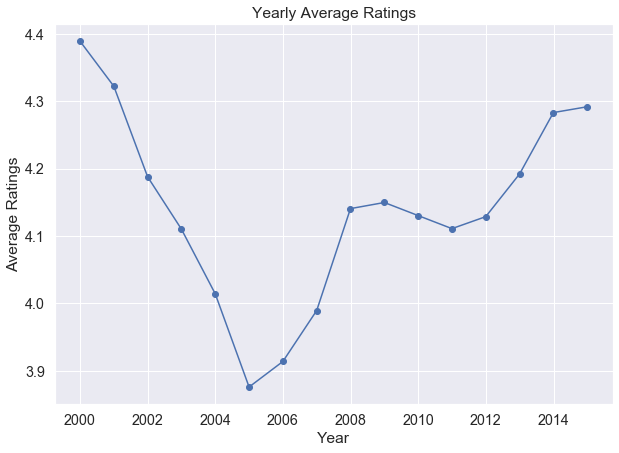

In [15]:
#plot the yearly averages
plt.title('Yearly Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Ratings')

plt.plot(yearly_ratings, marker='o')
plt.show()

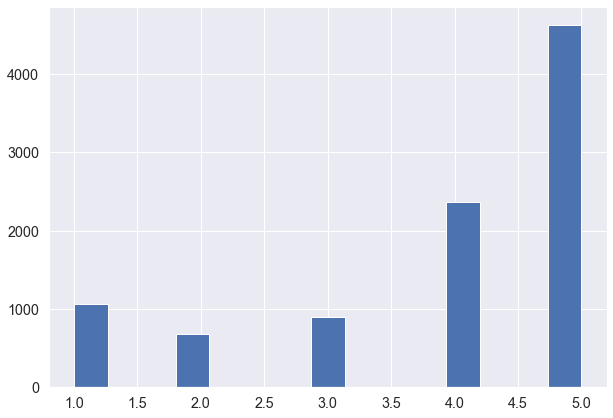

In [16]:
rating_at_year = df_time_rating[df_time_rating.index.year == 2005]
plt.hist(rating_at_year['rating'], bins=15)
plt.show()

filter by rating score, group by count per year


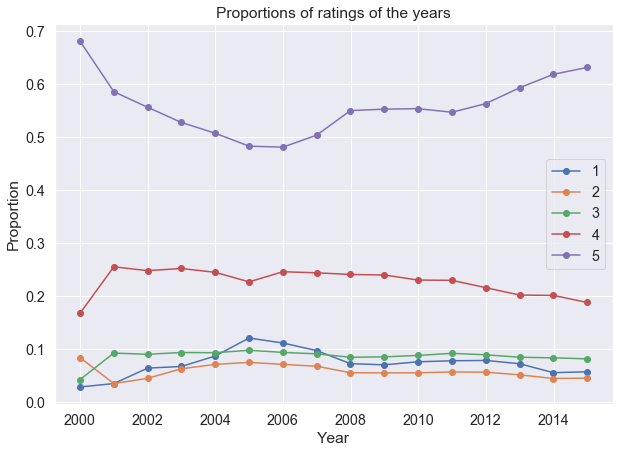

In [17]:
ratings = [1,2,3,4,5]

for rating in ratings:
    #resample first and then split into rating/not rating
    #yearly = df_time_rating.resample('1y').count
    rating_filter = df_time_rating[df_time_rating.rating == rating]
    rating_opposite = df_time_rating[df_time_rating.rating != rating]
    
    yearly_rating_count = rating_filter.resample('1y').count()
    yearly_ratings_count_opposite = rating_opposite.resample('1y').count()
    yearly_proportions = yearly_rating_count/(yearly_ratings_count_opposite + yearly_rating_count)
    plt.plot(yearly_proportions, marker='o', label=rating)

plt.title('Proportions of ratings of the years')
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.legend()
plt.show()

in 2005 and 2006, proportion of 1 ratings were above proportions of 2 and 3. Proportion of 5s were the lowest during that time as well.

In [83]:
yearly_proportions

,rating
reviewTime,
1999-12-31,2.130435
2000-12-31,1.410029
2001-12-31,1.250350
2002-12-31,1.114155
2003-12-31,1.026857
2004-12-31,0.931486
2005-12-31,0.924521
2006-12-31,1.012114
2007-12-31,1.219371


In [60]:
yearly_rating_count.rating

reviewTime
1999-12-31        49
2000-12-31       478
2001-12-31       894
2002-12-31      1220
2003-12-31      1797
2004-12-31      2488
2005-12-31      4630
2006-12-31      7770
2007-12-31     19766
2008-12-31     27533
2009-12-31     39081
2010-12-31     56697
2011-12-31     97539
2012-12-31    167615
2013-12-31    366240
2014-12-31    215229
Freq: A-DEC, Name: rating, dtype: int64

In [64]:
yearly_ratings['rating']

reviewTime
1999-12-31    4.388889
2000-12-31    4.321909
2001-12-31    4.187694
2002-12-31    4.110151
2003-12-31    4.014378
2004-12-31    3.876139
2005-12-31    3.913986
2006-12-31    3.989448
2007-12-31    4.140566
2008-12-31    4.149623
2009-12-31    4.130232
2010-12-31    4.110890
2011-12-31    4.128648
2012-12-31    4.192025
2013-12-31    4.282935
2014-12-31    4.291534
Freq: A-DEC, Name: rating, dtype: float64

In [68]:
bs_means = np.empty(10000)
for i in range(10000):
    #bs = .sample(n=len(), replace=True)
    bs_rep = bs.mean()
    bs_means[i] = bs_rep

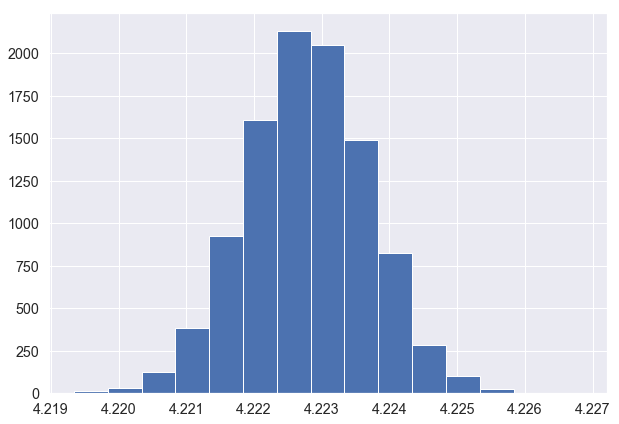

In [71]:
plt.hist(bs_means, bins=15)
plt.show()

In [73]:
mean_overall = df_time_rating.mean()
ratings_2005 = df_time_rating[df_time_rating.index.year == 2005]
mean_2005 = ratings_2005.mean()
obs_diff = mean_overall - mean_2005

shifted_2005 = ratings_2005 - mean_2005 + mean_overall

bs_diffs = np.empty(10000)
for i in range(10000):
    bs = shifted_2005.sample(n=len(shifted_2005), replace=True)
    bs_rep = mean_overall - bs.mean()
    bs_diffs[i] = bs_rep
    

In [ ]:
#look at bootstrap resampling an array of indexes so that dont have to bootstrap twice

[]

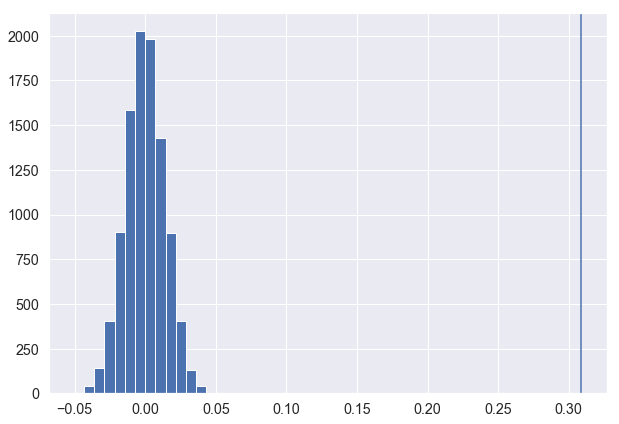

In [80]:
plt.hist(bs_diffs, bins=15)
plt.axvline(obs_diff.values)
plt.plot()